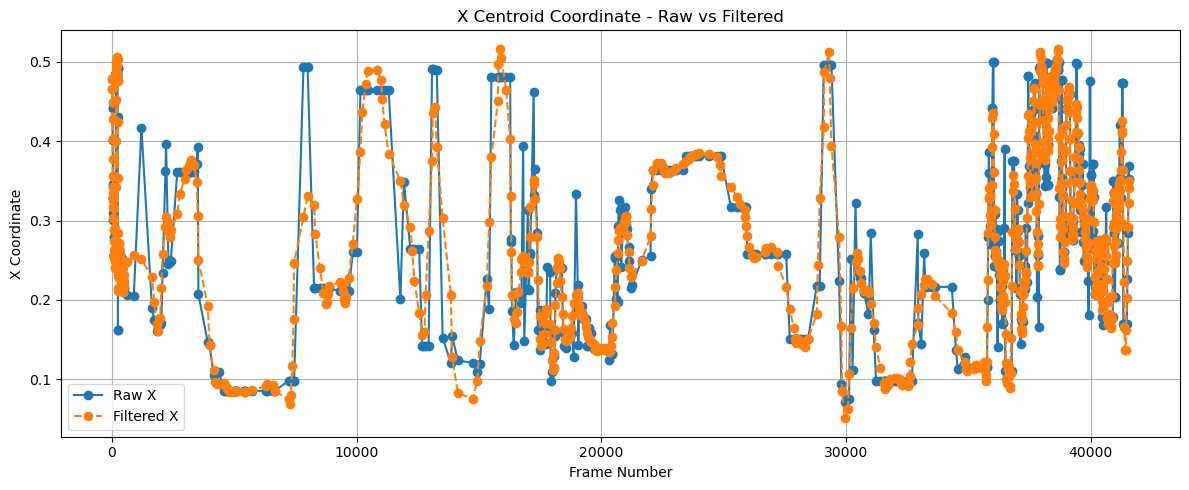

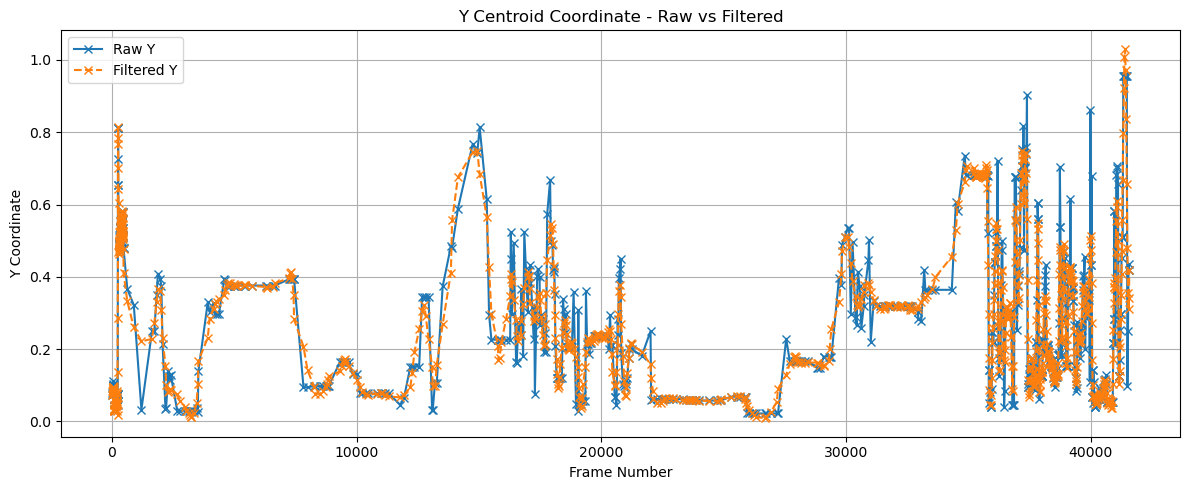

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import ast

# Load the CSV
csv_file_path = r"4_merged\4_merged_video01.csv"
df = pd.read_csv(csv_file_path)

# Filter Class ID = 2
df = df[df['Class ID'] == 2].copy()

# Parse centroid into x and y
df[['x', 'y']] = df['centroid'].apply(lambda s: pd.Series(ast.literal_eval(s)))

# Apply low-pass Butterworth filter to x and y
fs = 24  # Sampling rate (adjust if you know the actual fps)
cutoff = 3  # Normalized frequency (0 < cutoff < fs/2)
b, a = scipy.signal.iirfilter(4, Wn=cutoff, fs=fs, btype="low", ftype="butter")

df['x_filt'] = scipy.signal.filtfilt(b, a, df['x'])
df['y_filt'] = scipy.signal.filtfilt(b, a, df['y'])

# Plot raw and filtered X
plt.figure(figsize=(12, 5))
plt.plot(df['frame_number'], df['x'], marker='o', label='Raw X')
plt.plot(df['frame_number'], df['x_filt'], marker='o', linestyle='--', label='Filtered X')
plt.xlabel('Frame Number')
plt.ylabel('X Coordinate')
plt.title('X Centroid Coordinate - Raw vs Filtered')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot raw and filtered Y
plt.figure(figsize=(12, 5))
plt.plot(df['frame_number'], df['y'], marker='x', label='Raw Y')
plt.plot(df['frame_number'], df['y_filt'], marker='x', linestyle='--', label='Filtered Y')
plt.xlabel('Frame Number')
plt.ylabel('Y Coordinate')
plt.title('Y Centroid Coordinate - Raw vs Filtered')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


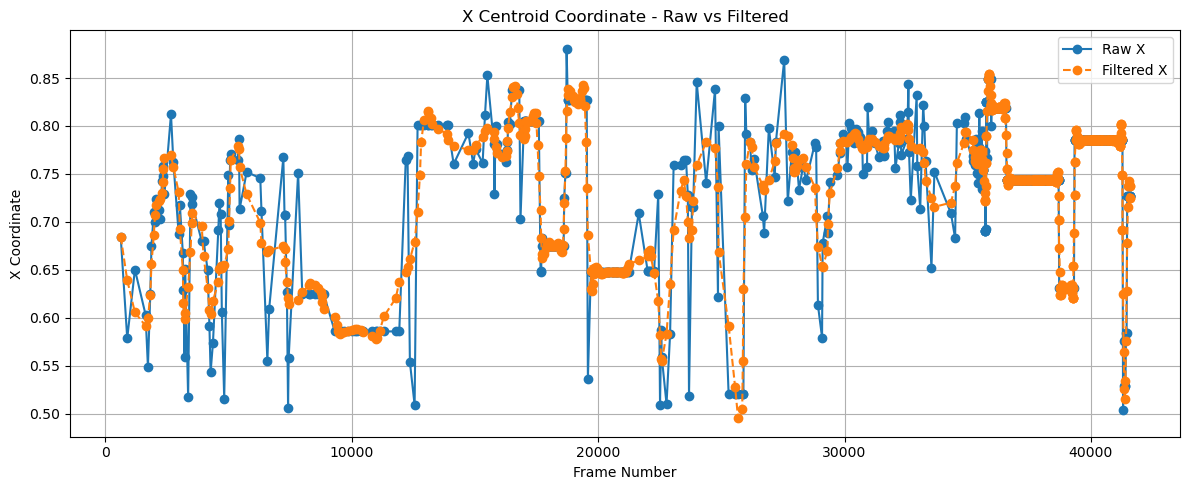

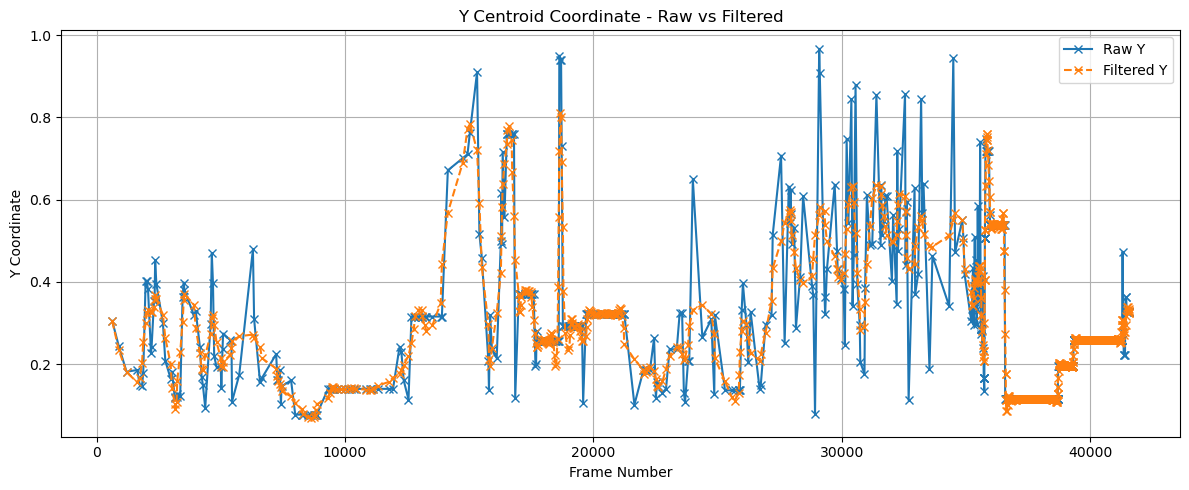

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# Load original and filtered files
original_file = r"4_merged\4_merged_video01.csv"
filtered_file = r"5_filtered_df\2_filtered_df_video01.csv"

df = pd.read_csv(original_file)
df_filtered = pd.read_csv(filtered_file)

# Filter for Class ID = 1
df = df[df['Class ID'] == 1].copy()
df_filtered = df_filtered[df_filtered['Class ID'] == 1].copy()

# Parse raw centroids
df[['x', 'y']] = df['centroid'].apply(lambda s: pd.Series(ast.literal_eval(s)))

# Parse filtered centroids
df_filtered[['x_filt', 'y_filt']] = df_filtered['centroid'].apply(lambda s: pd.Series(ast.literal_eval(s)))

# Merge both on frame_number to ensure alignment
df_merged = pd.merge(df, df_filtered[['frame_number', 'x_filt', 'y_filt']], on='frame_number', how='inner')

# Plot X coordinates
plt.figure(figsize=(12, 5))
plt.plot(df_merged['frame_number'], df_merged['x'], marker='o', label='Raw X')
plt.plot(df_merged['frame_number'], df_merged['x_filt'], marker='o', linestyle='--', label='Filtered X')
plt.xlabel('Frame Number')
plt.ylabel('X Coordinate')
plt.title('X Centroid Coordinate - Raw vs Filtered')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Y coordinates
plt.figure(figsize=(12, 5))
plt.plot(df_merged['frame_number'], df_merged['y'], marker='x', label='Raw Y')
plt.plot(df_merged['frame_number'], df_merged['y_filt'], marker='x', linestyle='--', label='Filtered Y')
plt.xlabel('Frame Number')
plt.ylabel('Y Coordinate')
plt.title('Y Centroid Coordinate - Raw vs Filtered')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


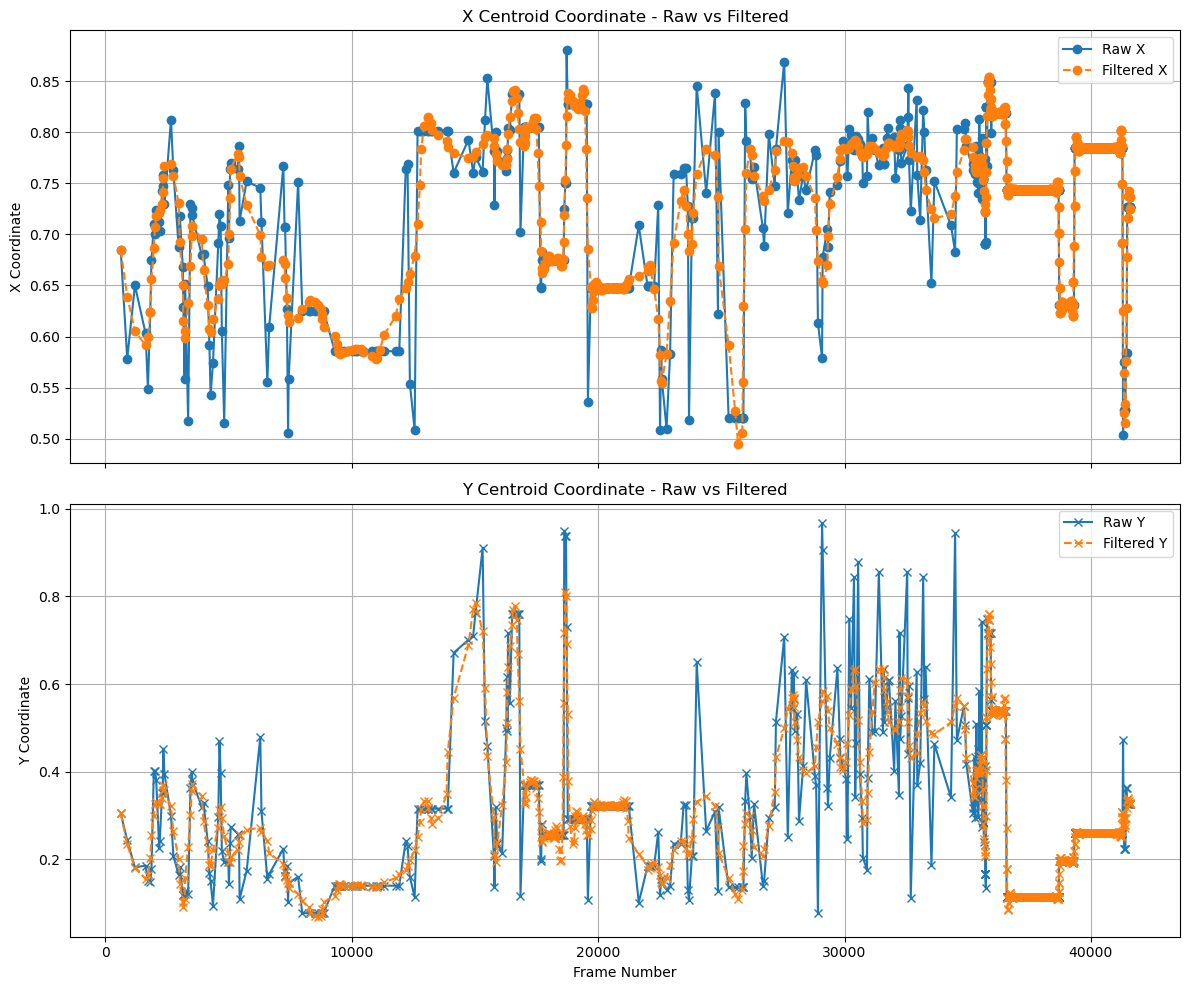

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# Load original and filtered files
original_file = r"4_merged\4_merged_video01.csv"
filtered_file = r"5_filtered_df\2_filtered_df_video01.csv"

df = pd.read_csv(original_file)
df_filtered = pd.read_csv(filtered_file)

# Filter for Class ID = 1
df = df[df['Class ID'] == 1].copy()
df_filtered = df_filtered[df_filtered['Class ID'] == 1].copy()

# Parse raw centroids
df[['x', 'y']] = df['centroid'].apply(lambda s: pd.Series(ast.literal_eval(s)))

# Parse filtered centroids
df_filtered[['x_filt', 'y_filt']] = df_filtered['centroid'].apply(lambda s: pd.Series(ast.literal_eval(s)))

# Merge both on frame_number to ensure alignment
df_merged = pd.merge(df, df_filtered[['frame_number', 'x_filt', 'y_filt']], on='frame_number', how='inner')

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Subplot 1 - X coordinates
axes[0].plot(df_merged['frame_number'], df_merged['x'], marker='o', label='Raw X')
axes[0].plot(df_merged['frame_number'], df_merged['x_filt'], marker='o', linestyle='--', label='Filtered X')
axes[0].set_ylabel('X Coordinate')
axes[0].set_title('X Centroid Coordinate - Raw vs Filtered')
axes[0].legend()
axes[0].grid(True)

# Subplot 2 - Y coordinates
axes[1].plot(df_merged['frame_number'], df_merged['y'], marker='x', label='Raw Y')
axes[1].plot(df_merged['frame_number'], df_merged['y_filt'], marker='x', linestyle='--', label='Filtered Y')
axes[1].set_xlabel('Frame Number')
axes[1].set_ylabel('Y Coordinate')
axes[1].set_title('Y Centroid Coordinate - Raw vs Filtered')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
